In [2]:
# Exploring Data
import pandas as pd

# Load the dataset
vac = pd.read_csv('Documents/Travel details dataset.csv')

In [3]:
print(vac.columns)

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')


In [4]:
# Print the DataFrame to verify
print(vac.head())

   Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK   5/1/2023   5/8/2023              7.0   
1        2  Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2        3   Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3        4     New York, USA  8/15/2023  8/29/2023             14.0   
4        5      Tokyo, Japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               1200              Flight   
1             Resort

In [5]:
# Get the dimensions of the DataFrame
dimensions = vac.shape

# Print the dimensions
print(dimensions)

(139, 13)


In [6]:
# Select specific columns (1, 2, 4, 5 in R are 0, 1, 3, 4 in Python)
selected_columns = vac.iloc[:, [0,6, 7, 10, 12]]
print(selected_columns)


     Trip ID  Traveler age Traveler gender Accommodation cost  \
0          1          35.0            Male               1200   
1          2          28.0          Female                800   
2          3          45.0            Male               1000   
3          4          29.0          Female               2000   
4          5          26.0          Female                700   
..       ...           ...             ...                ...   
134      135          37.0            Male               2500   
135      136          29.0          Female               5000   
136      137          34.0            Male               2000   
137      138          25.0          Female               6000   
138      139          39.0            Male               7000   

    Transportation cost  
0                   600  
1                   500  
2                   700  
3                  1000  
4                   200  
..                  ...  
134                2000  
135        

In [8]:
# Select the 'Income2' column
inc2 = vac['Transportation cost']

# Get the unique levels (categories) of the 'Income2' column
levels = inc2.unique()

# Print the levels
print(levels)

['600' '500' '700' '1000' '200' '800' '1200' '100' '400' '150' '$400 '
 '$700 ' '$150 ' '$800 ' '$100 ' '$600 ' '$80 ' '$500 ' '$300 ' '$50 '
 '$120 ' '$75 ' '900' '50' '$200 ' '$250 ' '$20 ' '300' nan '800 USD'
 '200 USD' '500 USD' '700 USD' '300 USD' '600 USD' '400 USD' '1000 USD'
 '100 USD' '350 USD' '150 USD' '$1,200 ' '$900 ' '$1,500 ' '$1,000 ' '250'
 '2500' '1500' '2000' '3000']


In [22]:
# Summary statistics for numerical columns
summary = vac.describe()
print(summary)

# Summary statistics for categorical columns
summary_categorical = vac.describe(include=['object'])
print(summary_categorical)


          Trip ID  Duration (days)  Traveler age
count  139.000000       137.000000    137.000000
mean    70.000000         7.605839     33.175182
std     40.269923         1.601276      7.145441
min      1.000000         5.000000     20.000000
25%     35.500000         7.000000     28.000000
50%     70.000000         7.000000     31.000000
75%    104.500000         8.000000     38.000000
max    139.000000        14.000000     60.000000
       Destination Start date  End date Traveler name Traveler gender  \
count          137        137       137           137             137   
unique          59        111       125           109               2   
top          Paris  8/15/2023  7/8/2023    John Smith          Female   
freq             7          4         3             6              70   

       Traveler nationality Accommodation type Accommodation cost  \
count                   137                137                137   
unique                   41                  8         

In [32]:
# Remove any non-numeric characters and convert to numeric
vac['Accommodation cost'] = vac['Accommodation cost'].replace('[\$, USD]', '', regex=True).astype(float)
vac['Transportation cost'] = vac['Transportation cost'].replace('[\$, USD]', '', regex=True).astype(float)

# Check if the conversion was successful
print(vac[['Accommodation cost', 'Transportation cost']].head())


   Accommodation cost  Transportation cost
0              1200.0                600.0
1               800.0                500.0
2              1000.0                700.0
3              2000.0               1000.0
4               700.0                200.0


In [33]:
# Summary statistics for numerical columns
summary = vac.describe()
print(summary)


          Trip ID  Duration (days)  Traveler age  Accommodation cost  \
count  139.000000       137.000000    137.000000          137.000000   
mean    70.000000         7.605839     33.175182         1245.109489   
std     40.269923         1.601276      7.145441         1337.349836   
min      1.000000         5.000000     20.000000          100.000000   
25%     35.500000         7.000000     28.000000          600.000000   
50%     70.000000         7.000000     31.000000          900.000000   
75%    104.500000         8.000000     38.000000         1200.000000   
max    139.000000        14.000000     60.000000         8000.000000   

       Transportation cost  
count           136.000000  
mean            645.183824  
std             584.476153  
min              20.000000  
25%             200.000000  
50%             550.000000  
75%             800.000000  
max            3000.000000  


In [34]:
# Check for missing values
missing_values = vac.isnull().sum()
print(missing_values)


Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
Total cost              3
Age group               5
dtype: int64


In [35]:
# Value counts for 'Traveler gender'
gender_counts = vac['Traveler gender'].value_counts()
print(gender_counts)


Traveler gender
Female    70
Male      67
Name: count, dtype: int64


In [36]:
# Average accommodation and transportation cost by gender
grouped_costs = vac.groupby('Traveler gender')[['Accommodation cost', 'Transportation cost']].mean()
print(grouped_costs)


                 Accommodation cost  Transportation cost
Traveler gender                                         
Female                  1271.142857           663.928571
Male                    1217.910448           625.303030


In [37]:
# Total trip cost (accommodation + transportation)
vac['Total cost'] = vac['Accommodation cost'] + vac['Transportation cost']
print(vac.head())


   Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK   5/1/2023   5/8/2023              7.0   
1        2  Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2        3   Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3        4     New York, USA  8/15/2023  8/29/2023             14.0   
4        5      Tokyo, Japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type  Accommodation cost Transportation type  \
0              Hotel              1200.0              Flight   
1             Reso

In [38]:
# Filter travelers over 30 years old
over_30 = vac[vac['Traveler age'] > 30]
print(over_30)


     Trip ID             Destination  Start date    End date  Duration (days)  \
0          1              London, UK    5/1/2023    5/8/2023              7.0   
2          3         Bali, Indonesia    7/1/2023    7/8/2023              7.0   
5          6           Paris, France   10/5/2023  10/10/2023              5.0   
6          7       Sydney, Australia  11/20/2023  11/30/2023             10.0   
8          9  Amsterdam, Netherlands   2/14/2024   2/21/2024              7.0   
..       ...                     ...         ...         ...              ...   
131      132       Sydney, Australia   6/15/2023   6/21/2023              6.0   
132      133             Rome, Italy    7/1/2023    7/8/2023              7.0   
134      135  Rio de Janeiro, Brazil    8/1/2023   8/10/2023              9.0   
136      137       Bangkok, Thailand    9/1/2023    9/8/2023              7.0   
138      139   Auckland, New Zealand   10/1/2023   10/8/2023              7.0   

     Traveler name  Travele

In [39]:
# Crosstabulation of gender and age groups
vac['Age group'] = pd.cut(vac['Traveler age'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
crosstab = pd.crosstab(vac['Traveler gender'], vac['Age group'])
print(crosstab)


Age group        20-30  30-40  40-50
Traveler gender                     
Female              41     27      2
Male                19     22     23


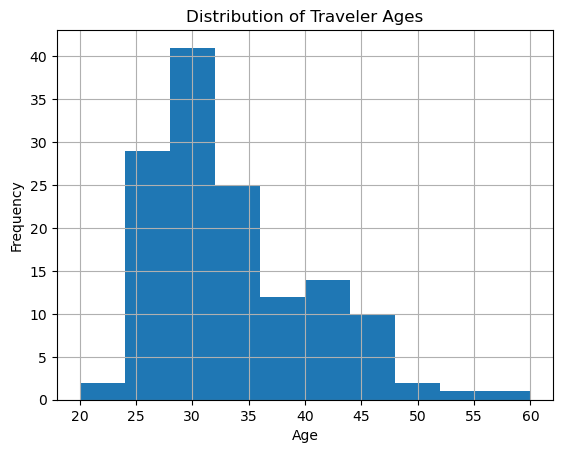

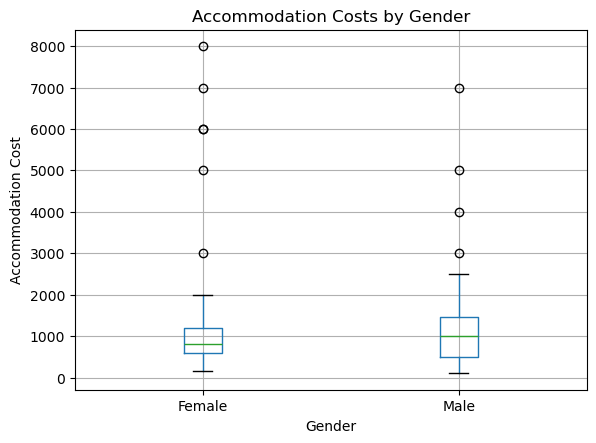

In [40]:
import matplotlib.pyplot as plt

# Histogram of traveler ages
vac['Traveler age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Traveler Ages')
plt.show()

# Box plot of accommodation costs by gender
vac.boxplot(column='Accommodation cost', by='Traveler gender')
plt.xlabel('Gender')
plt.ylabel('Accommodation Cost')
plt.title('Accommodation Costs by Gender')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.show()


In [43]:
# Create bins for transportation cost (this step depends on your specific data distribution)
bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
labels = ["0-500", "500-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000-6000", "6000-7000", "7000-8000"]

# Bin the 'Transportation cost' column
vac['Transportation cost binned'] = pd.cut(trans_cost, bins=bins, labels=labels, right=False)

# Create a contingency table of the original vs binned 'Transportation cost'
contingency_table = pd.crosstab(trans_cost, vac['Transportation cost binned'], rownames=['orig'], colnames=['binned'])

# Print the contingency table
print(contingency_table)


binned  0-500  500-1000  1000-2000  2000-3000  3000-4000
orig                                                    
20.0        1         0          0          0          0
50.0        3         0          0          0          0
75.0        1         0          0          0          0
80.0        1         0          0          0          0
100.0      10         0          0          0          0
120.0       1         0          0          0          0
150.0      11         0          0          0          0
200.0      10         0          0          0          0
250.0       2         0          0          0          0
300.0       9         0          0          0          0
350.0       1         0          0          0          0
400.0       7         0          0          0          0
500.0       0        11          0          0          0
600.0       0         9          0          0          0
700.0       0        15          0          0          0
800.0       0        16        

In [44]:

# Save the modified DataFrame to a new CSV file
vac.to_csv("modified_vacation.csv", index=False)


In [45]:
# Select numeric columns for PCA
vac_numeric = vac.select_dtypes(include=[float, int])

# Display the first few rows of the selected data
print(vac_numeric.head())


   Trip ID  Duration (days)  Traveler age  Accommodation cost  \
0        1              7.0          35.0              1200.0   
1        2              5.0          28.0               800.0   
2        3              7.0          45.0              1000.0   
3        4             14.0          29.0              2000.0   
4        5              7.0          26.0               700.0   

   Transportation cost  Total cost  
0                600.0      1800.0  
1                500.0      1300.0  
2                700.0      1700.0  
3               1000.0      3000.0  
4                200.0       900.0  


In [49]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select numeric columns for PCA
vac_numeric = vac.select_dtypes(include=[float, int])

# Initialize PCA with the number of components you want to extract
pca = PCA(n_components=20)

# Fit the PCA model
vac_pca = pca.fit_transform(vac_numeric)

# Create a DataFrame to hold the PCA results
pca_df = pd.DataFrame(data=vac_pca, columns=[f'PC{i+1}' for i in range(20)])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Create a summary of the PCA results
pca_summary = {
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': np.cumsum(explained_variance)
}

# Convert the summary to a DataFrame
pca_summary_df = pd.DataFrame(pca_summary)
print(pca_summary_df)

# Print the rotation (loadings) matrix
rotation_matrix = pca.components_.T
rotation_df = pd.DataFrame(data=rotation_matrix, columns=[f'PC{i+1}' for i in range(20)], index=vac_numeric.columns)
print(rotation_df)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, 21))
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, 21))
plt.show()